# Number Recognition with the MNIST dataset

"""
This code sets up an DNN AI using the MNIST dataset to recognize numbers.
"""

## Importing the necessary libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from keras.datasets import mnist

/Users/florianbaumard/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Loading MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data Preprocessing

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


## Model Definition

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Compilation

In [26]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Model Training

In [28]:
history = model.fit(x_train, y_train, batch_size=512, epochs=16, validation_data=(x_test, y_test))

Epoch 1/16
118/118 [==============================] - 1s 9ms/step - loss: 1.9807 - accuracy: 0.8347 - val_loss: 2.8768 - val_accuracy: 0.7908
Epoch 2/16
118/118 [==============================] - 1s 8ms/step - loss: 2.2616 - accuracy: 0.8292 - val_loss: 2.3069 - val_accuracy: 0.8369
Epoch 3/16
118/118 [==============================] - 1s 8ms/step - loss: 2.2597 - accuracy: 0.8337 - val_loss: 2.9543 - val_accuracy: 0.7929
Epoch 4/16
118/118 [==============================] - 1s 8ms/step - loss: 2.6740 - accuracy: 0.8217 - val_loss: 3.2709 - val_accuracy: 0.7848
Epoch 5/16
118/118 [==============================] - 1s 8ms/step - loss: 2.7498 - accuracy: 0.8296 - val_loss: 2.2658 - val_accuracy: 0.8451
Epoch 6/16
118/118 [==============================] - 1s 8ms/step - loss: 2.9879 - accuracy: 0.8194 - val_loss: 2.8706 - val_accuracy: 0.8240
Epoch 7/16
118/118 [==============================] - 1s 8ms/step - loss: 2.8886 - accuracy: 0.8328 - val_loss: 3.1337 - val_accuracy: 0.8106
Epoch 

## Evaluate the model

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 10.4699
Test accuracy : 0.7411


## Plot history

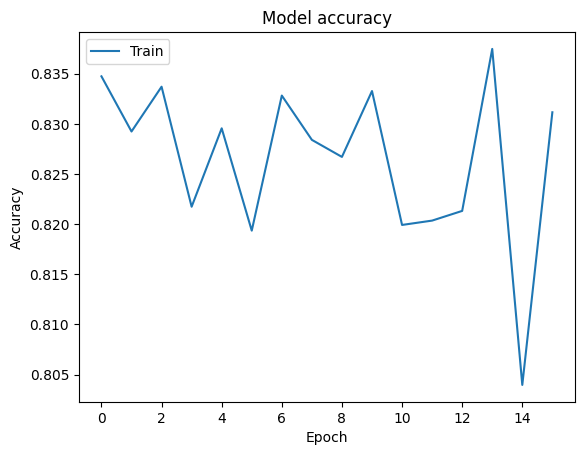

In [30]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

## Confusion Matrix

313/313 [==============================] - 1s 2ms/step
tf.Tensor(
[[ 922    0    2   14    2    4   34    2    0    0]
 [   0 1085    6   38    0    4    1    0    1    0]
 [  11    7  817  143   30    2   10    3    9    0]
 [   4    1   36  876    1   33    7    7   41    4]
 [   0    2    0   21  931    0   10    0    2   16]
 [  12    1    4  110   25  560  136    4   39    1]
 [  13    5    3   40   44    6  847    0    0    0]
 [   2   14   41   86   24    0    2  823    0   36]
 [  13   20   21  183   21   29   29    7  631   20]
 [   6   10    1   68   63    9   21   20   12  799]], shape=(10, 10), dtype=int32)


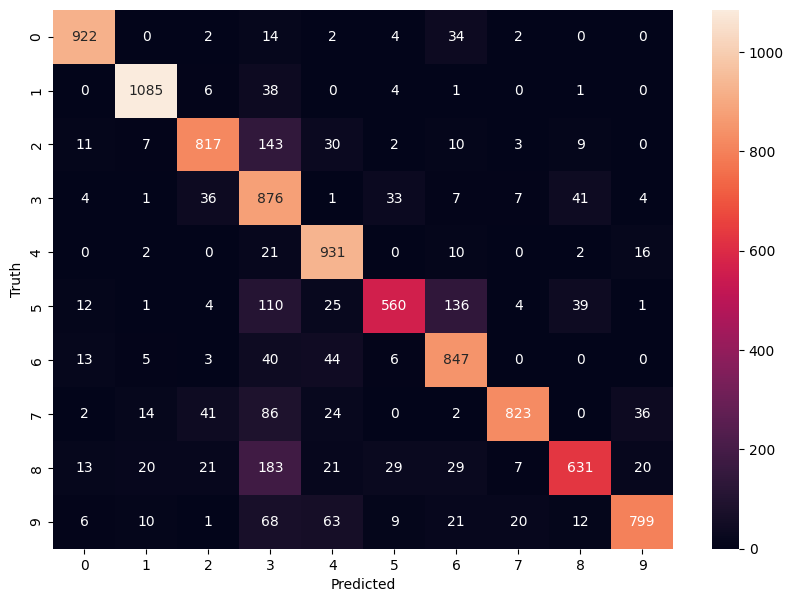

In [23]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=-1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=predicted_classes)
print(confusion_matrix)

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

## Plot some errors

313/313 [==============================] - 1s 2ms/step


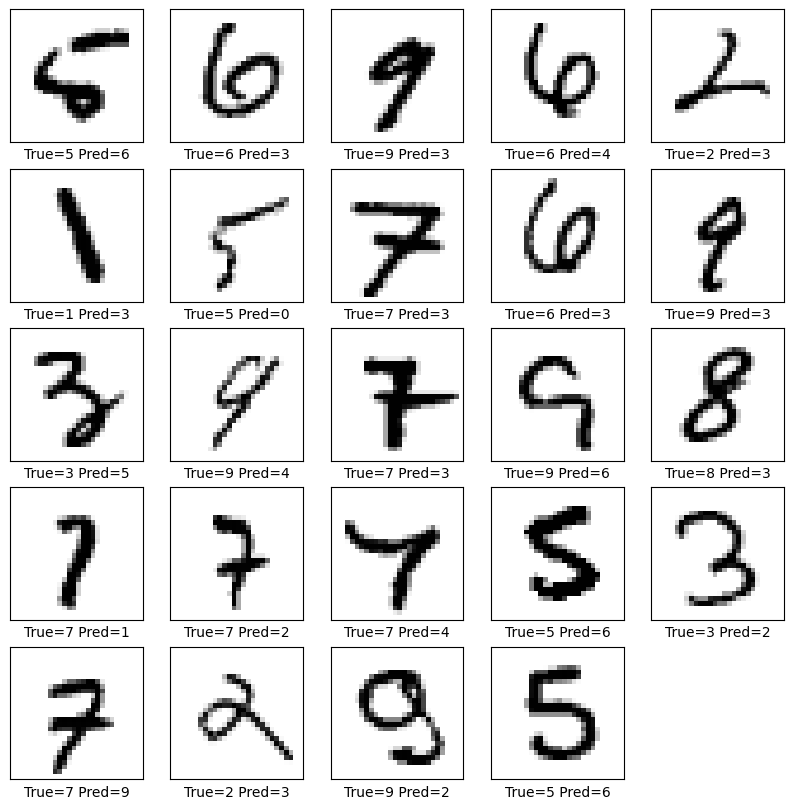

In [24]:
y_sigmoid = model.predict(x_test, verbose=1)
y_pred = np.argmax(y_sigmoid, axis=-1)

errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]

plt.figure(figsize=(10,10))

for i in range(len(errors)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[errors[i]], cmap=plt.cm.binary)
    plt.xlabel(f'True={y_test[errors[i]]} Pred={y_pred[errors[i]]}')
    
plt.show()